#STA365 HW4
## Ray




# Homework #4 Part I: Fit this model using HMC in `PyMC`

For the model specification example considered in "Metropolis within Gibbs" above...


## Provide posterior analysis for this model using "default" `PyMC`

- Don't try to do "Metropolis within Gibbs" `in PyMC` -- you can't -- use the default HMC sampler
- You can do this without knowing what HMC is: you've already previously used HMC with `PyMC`; and, you can go get the distributions you need [here...](https://www.pymc.io/projects/docs/en/stable/api/distributions.html)
- ***Explore and describe the sample sizes needed to support inference regarding the `df` parameter $(\nu)$***

In [1]:
import pymc as pm
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

np.random.seed(131)

In [2]:
pt_one_model = pm.Model()

n, loc_true, scale_true, df_true = 100, 10, 2, 15
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n)

with pt_one_model:
    mu_0 = 0
    sigma_0 = 10
    loc = pm.Normal("loc", mu=mu_0, sigma=sigma_0)
    scale = pm.HalfNormal("scale", sigma=5)
    df = pm.DiscreteUniform("df", lower=1, upper=101)
    x_obs = pm.StudentT("likelihood", mu=loc, sigma=scale, nu=df, observed=x)

with pt_one_model:
    pt_one_HMC = pm.sample()

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


HMC Split-Rhats part one model {'loc': 1.0007, 'df': 1.4783, 'scale': 1.02}


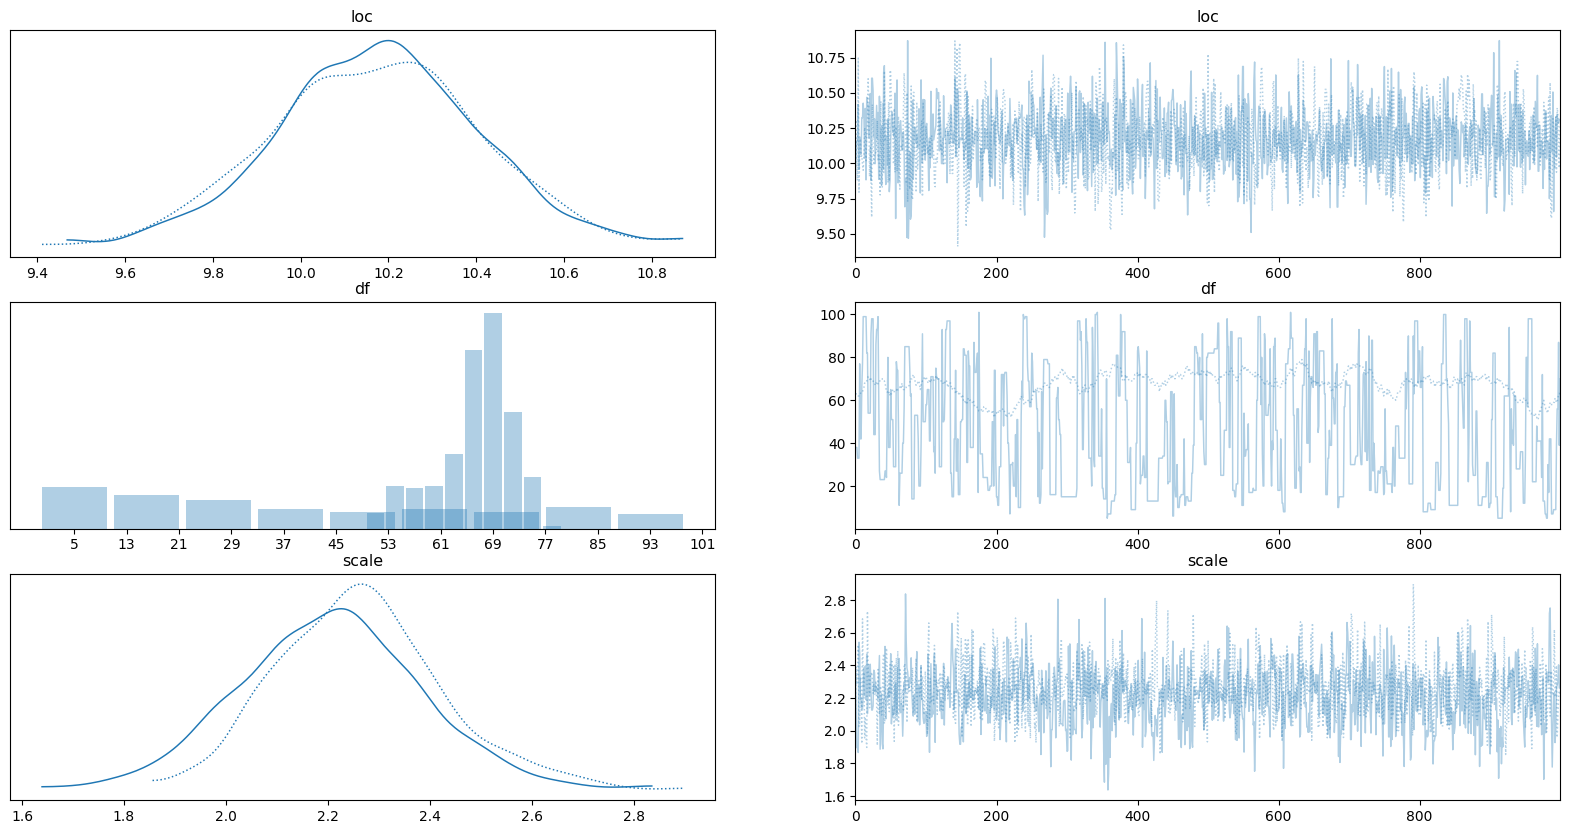

In [3]:
# Conduct Posterior Analysis
fig,ax = plt.subplots(3,2, figsize=(20,10))
az.plot_trace(pt_one_HMC, axes=ax[:3,:2])
print("HMC Split-Rhats part one model", {k: np.round(v.values,4) for k,v in az.rhat(pt_one_HMC).items()})

array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

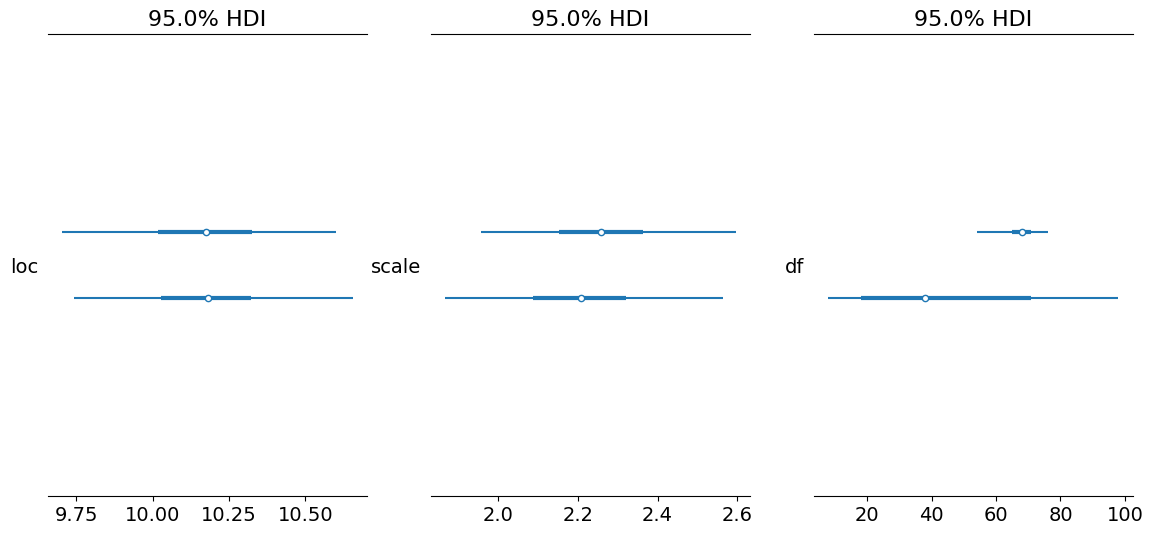

In [4]:
# Plotting Credible Intervals
fig,ax = plt.subplots(1,3, figsize=(14,6))
az.plot_forest(pt_one_HMC, var_names=["loc"], combined=False, hdi_prob=0.95, ax=ax[0])
az.plot_forest(pt_one_HMC, var_names=["scale"], combined=False, hdi_prob=0.95, ax=ax[1])
az.plot_forest(pt_one_HMC, var_names=["df"], combined=False, hdi_prob=0.95, ax=ax[2])

HMC Split-Rhats part one model {'loc': 1.0004, 'df': 1.014, 'scale': 1.008}


array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

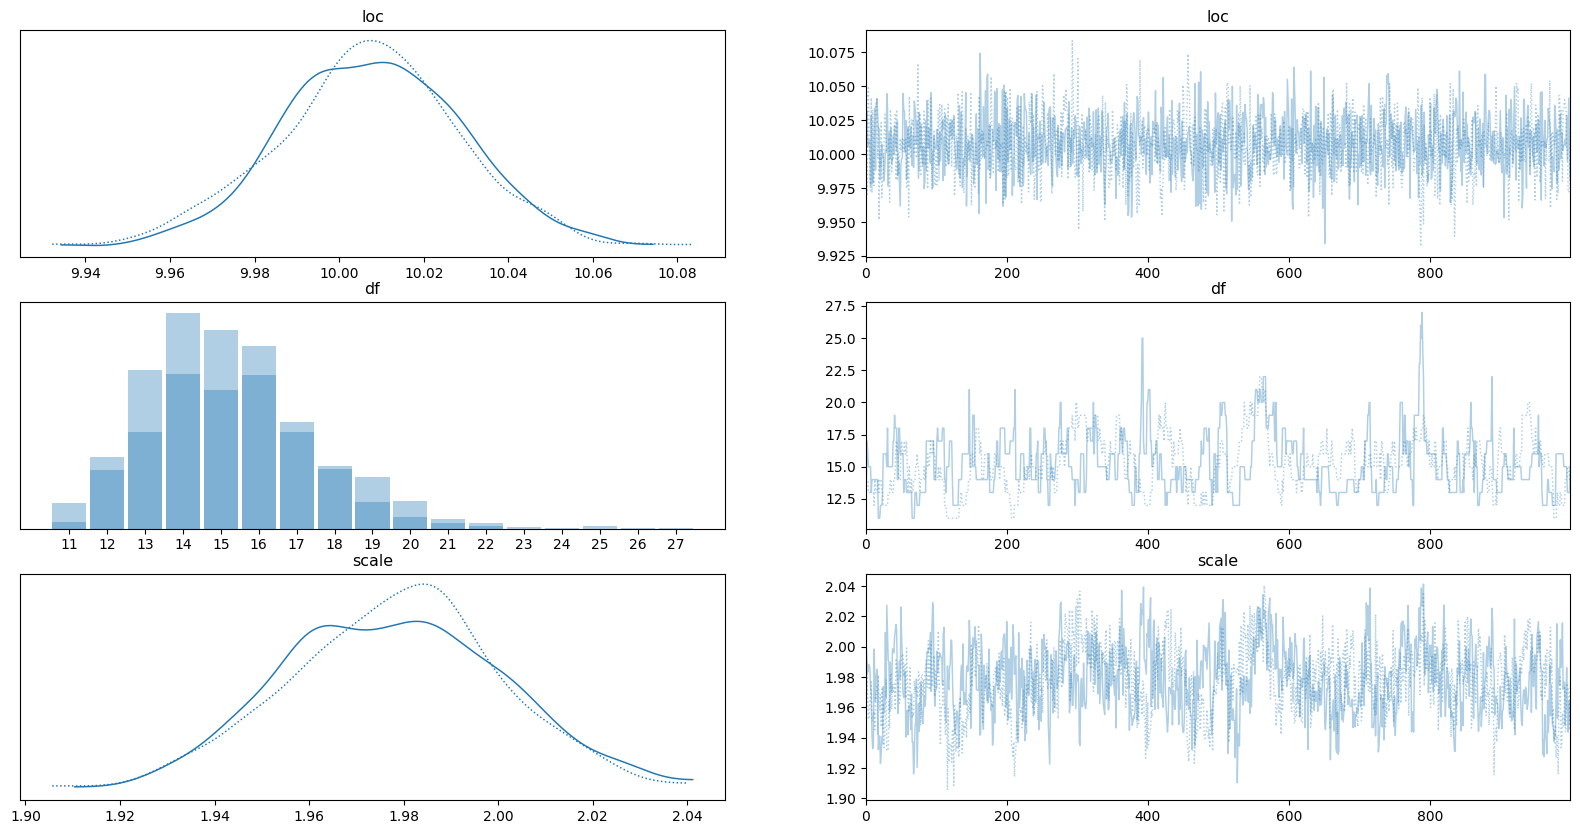

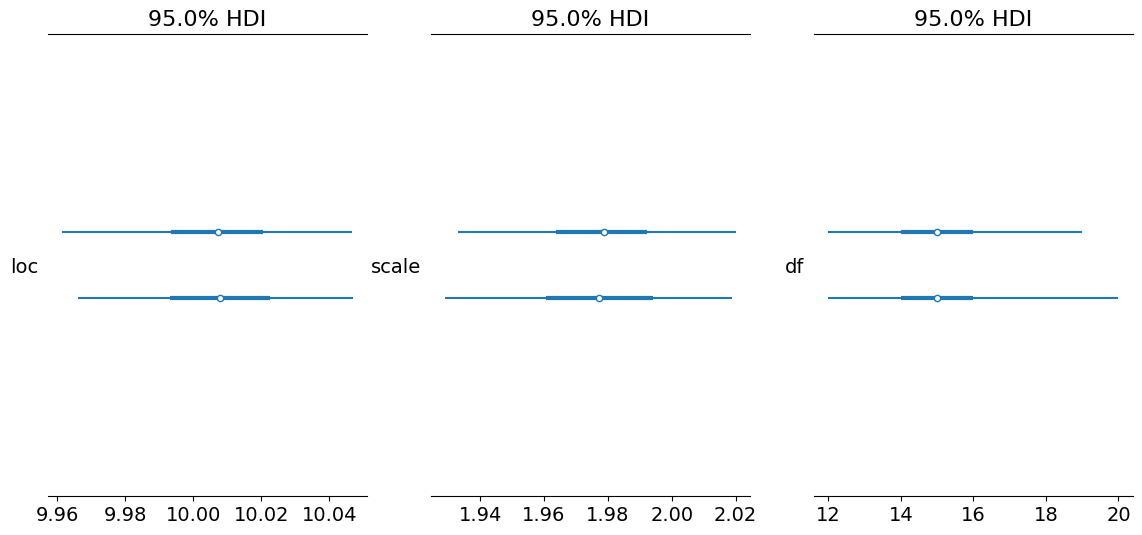

In [5]:
pt_one_model_large_n = pm.Model()

n, loc_true, scale_true, df_true = 10000, 10, 2, 15
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n)

with pt_one_model_large_n:
    mu_0 = 0
    sigma_0 = 10
    loc = pm.Normal("loc", mu=mu_0, sigma=sigma_0)
    scale = pm.HalfNormal("scale", sigma=5)
    df = pm.DiscreteUniform("df", lower=1, upper=101)
    x_obs = pm.StudentT("likelihood", mu=loc, sigma=scale, nu=df, observed=x)

with pt_one_model_large_n:
    pt_one_large_n_HMC = pm.sample()

# Conduct Posterior Analysis
fig,ax = plt.subplots(3,2, figsize=(20,10))
az.plot_trace(pt_one_large_n_HMC, axes=ax[:3,:2])
print("HMC Split-Rhats part one model", {k: np.round(v.values,4) for k,v in az.rhat(pt_one_large_n_HMC).items()})

# Plotting Credible Intervals
fig,ax = plt.subplots(1,3, figsize=(14,6))
az.plot_forest(pt_one_large_n_HMC, var_names=["loc"], combined=False, hdi_prob=0.95, ax=ax[0])
az.plot_forest(pt_one_large_n_HMC, var_names=["scale"], combined=False, hdi_prob=0.95, ax=ax[1])
az.plot_forest(pt_one_large_n_HMC, var_names=["df"], combined=False, hdi_prob=0.95, ax=ax[2])

In [6]:
az.summary(pt_one_HMC, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc,10.17,0.23,9.74,10.62,0.01,0.00,1707.93,1131.78,1.00
df,56.34,23.46,6.00,85.00,7.67,5.60,30.28,211.47,1.48
scale,2.23,0.17,1.93,2.59,0.01,0.01,301.36,752.83,1.02


In [7]:
az.summary(pt_one_large_n_HMC, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc,10.01,0.02,9.97,10.05,0.0,0.00,1952.57,1323.21,1.00
df,15.23,2.18,12.00,19.00,0.2,0.14,116.06,186.37,1.01
scale,1.98,0.02,1.93,2.02,0.0,0.00,172.11,421.83,1.01


## Analysis for Part 1

Observing the split-rhat values that the two models produce, I see that the rhat for df in the smaller dataset model is 1.48, which is bad as it is a large value(bigger than 1.05).

( I have also tried with n = 1000, but it did not improve significantly compared to n=100 in terms of the rhat value, so I increased it to 10000 instead)

Looking at the ess_bulk and ess_tail values, I do not see a drastic improvement on the increased dataset, but the values for the larger dataset is slightly higher for loc and df.

However, when looking at the credible interval range of 3% and 97%, and also observing the plotted credible intervals, we do see a significant improvement in the range of the intervals.

The most significant improvement is in the range of the degrees of freedom, where the smaller dataset model had a range from 6 to 85, and the larger dataset model had a range of 12 to 19. This is significantly narrower, and it suggests that the larger dataset model is more confident in estimating the degrees of freedom.

# Homework #4 Part II: HMC Diagnostics

- Return to your posterior analysis in "Homework #4 Part I" and
report on (a) ***effective sample sizes***; (b) ***chain convergence measures***; (c) ***divergences***; (d) ***Metropolis-Hastings acceptance rates*** [see below for how to access these]; and (e) any other warnings or concers provided by `PyMC`

- Now examine the [Eight Schools](https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/Week3/STA410_W24_Week3_Demo_HMCwithPyMC.ipynb) example PyMC model and outputted results
    - Provide an analogous report regarding (a)-(e) above for the "centered" and "uncentered" Eight Schools models
        - *Hint: for (d) see `fit_C.sample_stats.acceptance_rate.values.flatten()` and `fit_NC.sample_stats.acceptance_rate.values.flatten()` and in the Eight Schools example*
    - From the perspective of ***curvature*** of the ***energy function*** (that is, how rapidly the ***log joint posterior distribution density*** changes for different values of its ***random variable (parameters)*** and the effectiveness of the ***HMC*** algorithm, explain why the "uncentered" paramterization of the model performs better than the "centered" parameterization
        - *Hint: see the previous two slides...*
- Review [this](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#model-checking) and [that](https://discourse.pymc.io/t/about-nuts-sampling-and-energy-plot/831) discussing the ***diagnostic plot*** which compares the ***observed energy proposal distribution*** versus the ***empirical energy distribution*** of the generated HMC samples
    - Use the code on the next slide to provide and interpret the ***diagnostic plot*** assessing ***energy proposals*** versus the empirical ***energy*** distribution to compare and contrast the "centered" and "uncentered" Eight Schools models in relation to you previous comparision of these two model parameterization in terms of ***energy function curvature*** and the effectiveness of the ***HMC*** algorithm... does this diagnostic support your previous conclusions in these regards?


In [ ]:
## Effective Sample Sizes

In [8]:
# Effective Sample Size
print("number of smaller dataset samples:", pt_one_HMC.posterior['df'].values.flatten().shape[-1])
az.summary(pt_one_HMC, round_to=2)

number of smaller dataset samples: 2000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc,10.17,0.23,9.74,10.62,0.01,0.00,1707.93,1131.78,1.00
df,56.34,23.46,6.00,85.00,7.67,5.60,30.28,211.47,1.48
scale,2.23,0.17,1.93,2.59,0.01,0.01,301.36,752.83,1.02


In [9]:
print("number of larger dataset samples:", pt_one_large_n_HMC.posterior['df'].values.flatten().shape[-1])
az.summary(pt_one_large_n_HMC, round_to=2)

number of larger dataset samples: 2000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc,10.01,0.02,9.97,10.05,0.0,0.00,1952.57,1323.21,1.00
df,15.23,2.18,12.00,19.00,0.2,0.14,116.06,186.37,1.01
scale,1.98,0.02,1.93,2.02,0.0,0.00,172.11,421.83,1.01


## Chain Convergence Measures

Smaller dataset model Split-Rhats {'loc': 1.0007, 'df': 1.4783, 'scale': 1.02} | 

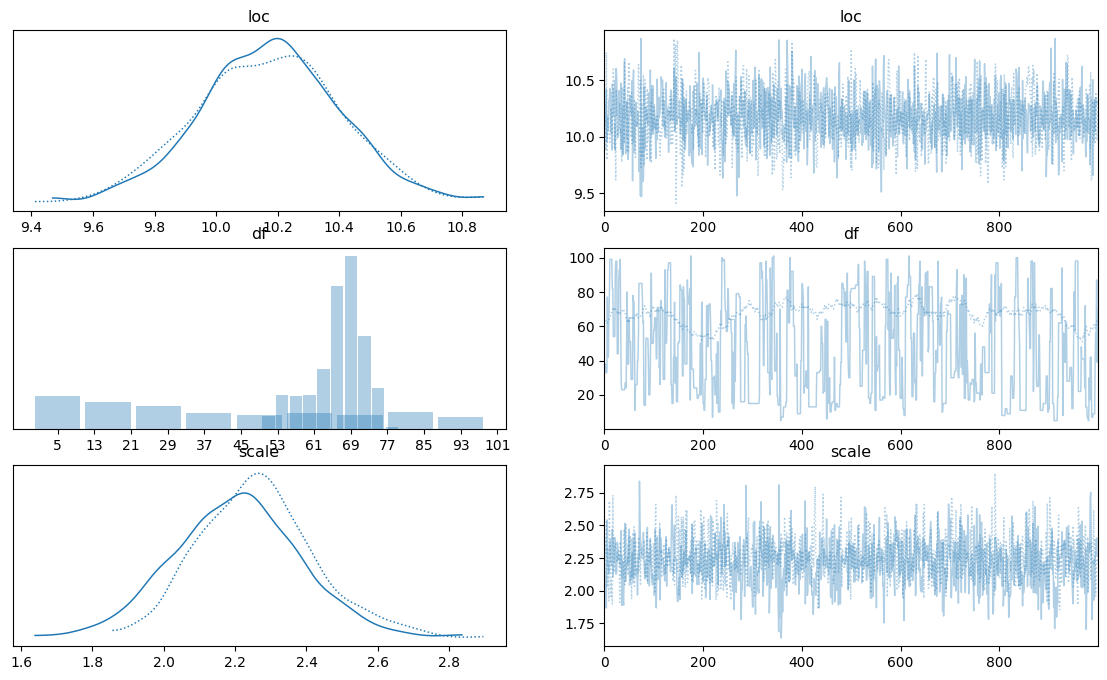

In [16]:
fig,ax = plt.subplots(3, 2, figsize=(14,8))
az.plot_trace(pt_one_HMC, axes=ax[:3,:2])
print("Smaller dataset model Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(pt_one_HMC).items()}, end=' | ')

Larger dataset model Split-Rhats {'loc': 1.0004, 'df': 1.014, 'scale': 1.008} | 

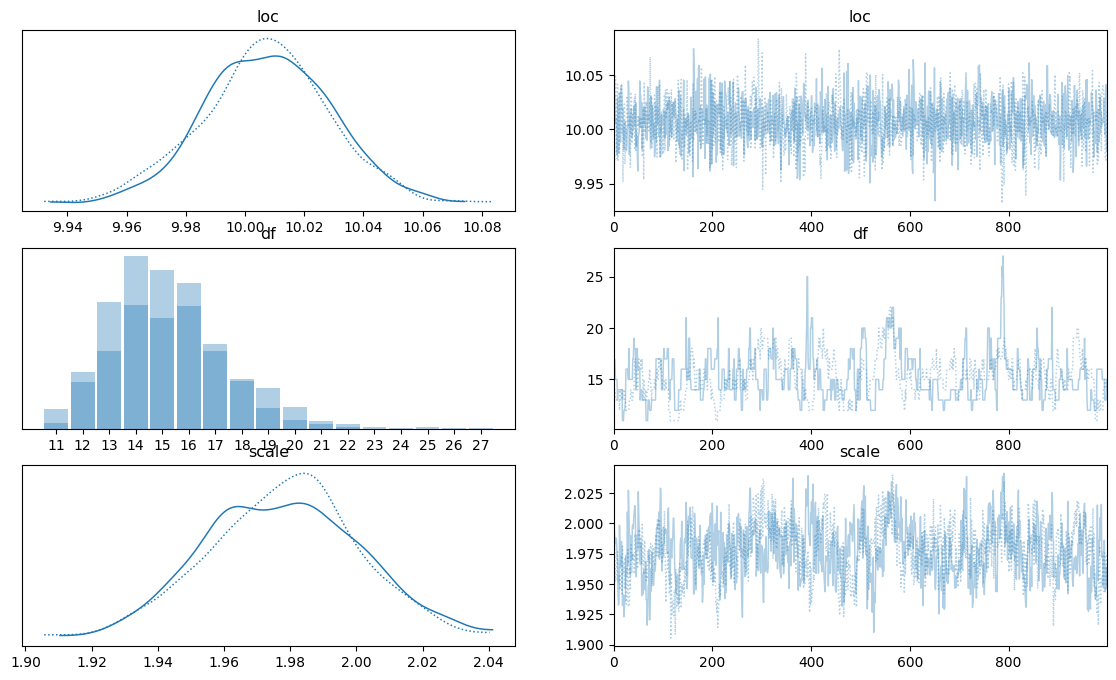

In [15]:
fig,ax = plt.subplots(3, 2, figsize=(14,8))
az.plot_trace(pt_one_large_n_HMC, axes=ax[:3,:2])
print("Larger dataset model Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(pt_one_large_n_HMC).items()}, end=' | ')

In the chain convergence test, we see that the rhat values for the larger dataset model are all very small. However, the rhat value for df in the smaller dataset model is 1.48, which is very large and fails the similarity test.

## Divergences

In the training output shown above (when we call pm.sample) we can see that the output reports on 0 divergences for both models.

## Acceptance Rates

From the histogram below, we can see that both the small and large dataset model has an acceptance rates mostly close to 1.

## Other warnings

No warnings from pymc are seen in both models

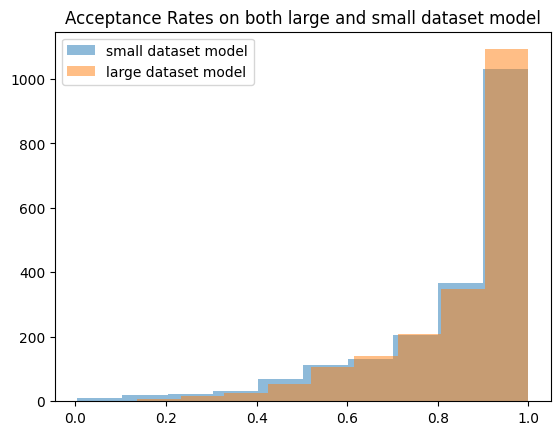

In [20]:
plt.hist(pt_one_HMC.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,
         label='small dataset model');
plt.hist(pt_one_large_n_HMC.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,
         label='large dataset model');
plt.title('Acceptance Rates on both large and small dataset model'); plt.legend();


# Eight Schols

In [21]:
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

In [22]:
# Centered
with pm.Model() as Centered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)

    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J)

    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

In [23]:
SEED = [20100420, 20134234]
with Centered_eight:
    fit_C = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                      return_inferencedata=True, idata_kwargs={"log_likelihood": True})

In [24]:
# Non Centered
with pm.Model() as NonCentered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)

    theta = pm.Deterministic("theta", mu + tau * theta_tilde)

    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

In [25]:
with NonCentered_eight:
    fit_NC = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                       return_inferencedata=True, idata_kwargs={"log_likelihood": True})

## (a) Effective Sample Size

From the table, we see that the Non-Centered model has a much larger effective sample size than that of the Centered Model.

In [26]:
import pandas as pd
print("Effective Sample Sizes (function of Markov Chain autocorrelation dependency)")
pd.concat(
[pd.DataFrame({'Centered': pm.summary(fit_C)[:1]['ess_bulk'],
              'Non-Centered': pm.summary(fit_NC)['ess_bulk'][:1]}),
 pd.DataFrame({'Centered': pm.summary(fit_C)[1:]['ess_bulk'],
              'Non-Centered': pm.summary(fit_NC)['ess_bulk'][9:]})])

Effective Sample Sizes (function of Markov Chain autocorrelation dependency)


,Centered,Non-Centered
mu,623.0,11120.0
tau,129.0,5121.0
theta[0],538.0,10859.0
theta[1],978.0,11965.0
theta[2],1575.0,11071.0
theta[3],965.0,12523.0
theta[4],1673.0,11294.0
theta[5],1769.0,10616.0
theta[6],415.0,11073.0
theta[7],1248.0,11415.0


## (b) Chain Convergence Measures

All rhat values are around 1 and smaller than 1.05. This means that all pass the similarity test.

In [29]:
print("Centered Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(fit_C).items()})
print()
print("Non-Centered Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(fit_NC).items()})

Centered Split-Rhats {'mu': 1.0055, 'theta': array([1.0065, 1.0039, 1.0032, 1.0046, 1.0017, 1.0035, 1.006 , 1.0024]), 'tau': 1.0226}

Non-Centered Split-Rhats {'mu': 1.0001, 'theta_t': array([1.0001, 1.0002, 1.    , 0.9999, 1.0002, 1.    , 1.0001, 1.0016]), 'tau': 1.0001, 'theta': array([1.0002, 1.0002, 1.    , 1.0006, 1.0007, 0.9999, 0.9999, 1.    ])}


## Divergence

From the output below, there are 354 divergences in the centered model and 8 divergence in the non-centered model.

In [31]:
print("Centered Divergence:", fit_C.sample_stats["diverging"].sum().item())
print("Non-Centered Divergence:", fit_NC.sample_stats["diverging"].sum().item())

Centered Divergence: 354
Non-Centered Divergence: 8


## Acceptance Rate

From the histogram, we see that the Non-Centered acceptance rates are mostly close to 1, whereas the Centered model's acceptance rates are near 0.

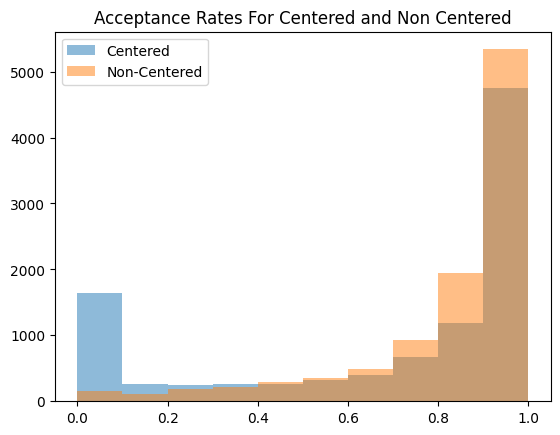

In [32]:
plt.hist(fit_C.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,
         label='Centered');
plt.hist(fit_NC.sample_stats.acceptance_rate.values.flatten(), alpha=0.5,
         label='Non-Centered');
plt.title('Acceptance Rates For Centered and Non Centered'); plt.legend();

## Analysis

From the reported numbers and graphs above, we can see that it seems like the Non-Centered model is performing better than the centered model.

From the number of divergence and acceptance rate, we see the Centered model had a lot more divergences than the Non-Centered one and it also had a much lower acceptance rate than the non-centered model. In terms of energy, this suggests that the Centered model had excessive curvature in the log joint distribution and it was drifting away from the distributional mass.

The low acceptance rate further suggests that the Centered model is having small steps that are still "close" to the original values and cannot make a proposal that can move far away.

Thus, from this analysis, we can conclude that the Non-Centered model had a better performance than the Centered model.

# Energy Plots

Below I have the energy plots displayed.

For the Centered model, which is the first graph, we see that the energy transition is much narrower than the marginal energy distribution. This suggests that the Centered model did not have enough energy to fully explore the parameter space and the posterior estimate is likely to be biased.

However, for the Non-Cenetered model, which is the second graph, we see that the energy transition and the marginal energy distribution are somewhat closely aligned, and both are narrow and match quite well. This suggests that the model had enough energy to fully explore the parameter space and the posterior estimate is unlikely to be biased.

These findings align with our previous analysis of the Non-Centered model performing better due to the analysis of acceptance rate, effective sample size, and divergence.

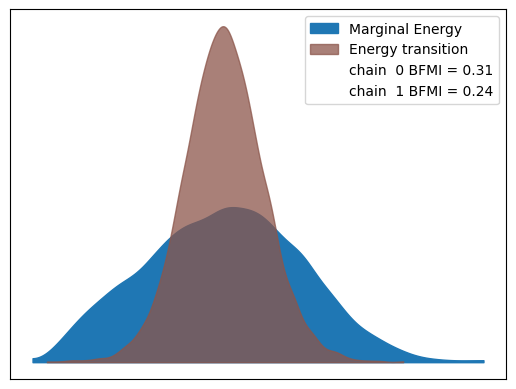

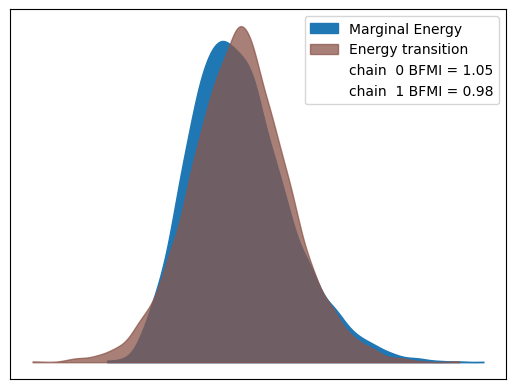

In [33]:
az.plot_energy(fit_C);
az.plot_energy(fit_NC);